# 최적의 매개변수를 찾고 최종 서포트 벡터 머신 모델을 만들어라. 
# 그리고 sklearn의 roc_curve 함수를 이용하여 roc curve를 그리고 결과를 해석하라.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.preprocessing import scale

In [19]:
# Loading csv

data = pd.read_csv("./csvfiles/유방암.csv",encoding='cp949')

data.head()

## check target

data['diagnosis'].describe()

# 0이 악성
print('악성(0)의 개수 :', len(data[data['diagnosis']==0]))

# 1이 양성
print('양성(1)의 개수 :', len(data[data['diagnosis']==1]))
#0,1로 구성된 data확인, 분류 기법으로 예측 필요 확인
print('결측치의 개수 :',data.isna().any().sum())
#결측치는 없음.


악성(0)의 개수 : 212
양성(1)의 개수 : 357
결측치의 개수 : 0


# X, Y로 모델링 준비하기

In [20]:
from sklearn.model_selection import train_test_split

y = data["diagnosis"]
x = data.drop("diagnosis", axis = 1)

# np.random.seed(seed = 1234)
# msk = np.random.rand(data.shape[0]) < 0.7
# ds_hmeq_train = data[msk]
# ds_hmeq_test = data[~msk]

# train_y = ds_hmeq_train["diagnosis"]
# train_x = ds_hmeq_train.drop("diagnosis", axis = 1)
# test_y = ds_hmeq_test["diagnosis"]
# test_x = ds_hmeq_test.drop("diagnosis", axis = 1)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=1234)
print("train data X size:", train_x.shape)
print("train data y size:", train_y.shape)
print("test data X size:", test_x.shape)
print("test data y size:", test_y.shape)


train data X size: (398, 30)
train data y size: (398,)
test data X size: (171, 30)
test data y size: (171,)


In [21]:
train_x_scaled = scale(train_x, axis = 0)
test_x_scaled = scale(test_x, axis = 0)

# 최적의 매개변수 찾기

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
# 새로운 scv 모형 생성
SVM = SVC()
SVM.fit(train_x_scaled,train_y)
# train 데이터 셋 정확도
print("Accuracy on test set : {:.3f}".format(SVM.score(test_x_scaled,test_y)))

print(SVM.get_params);

Accuracy on test set : 0.953
<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)>


##### GridSearchCV로 파타미터 찾기

In [26]:
C = [i for i in range(1,11)]
gamma = [i*0.1 for i in range(0,50)]
kernel = ['rbf', 'linear', 'poly', 'sigmoid']

parameters = {'C':C,'gamma':gamma, 'kernel':kernel, 'probability':[True]}

In [27]:
Gird_model = GridSearchCV(estimator = SVM, param_grid = parameters, 
                               cv = 10, n_jobs=-1, )

In [28]:
Gird_model.fit(train_x_scaled, train_y)
params = Gird_model.best_params_
params

/home/pirl/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1, 'gamma': 0.0, 'kernel': 'linear', 'probability': True}

* Best parameters를 찾았다.

In [29]:
print("Accuracy by model with best parameters:{:.3f}".format(Gird_model.score(test_x_scaled, test_y)))

Accuracy by model with best parameters:0.965


* Grid Search결과 accuracy가 95.3% -> 96.5%로 늘어난 것을 볼 수 있다.

In [30]:
best_param = {'C': 1, 'gamma': 0.0, 'kernel': 'linear'}

In [31]:
SVM = SVC(C=1, gamma='auto', kernel='linear', probability=True)

In [32]:
SVM.fit(train_x_scaled, train_y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
print(SVM.score(test_x_scaled, test_y).round(3)*100,'%')

96.5 %


# ROC Curve 그리기

In [37]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [38]:
predictions = SVM.predict_proba(test_x_scaled)

In [39]:
fpr, tpr, _ = roc_curve(test_y, predictions[:,1])

<Figure size 432x288 with 0 Axes>

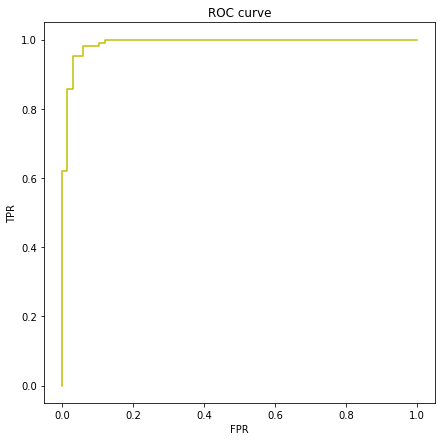

In [40]:
plt.clf()
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, c='y')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# 해석
* Grid Search결과 accuracy가 기존 모델의 95.3% -> 96.5%로 늘어난 것을 볼 수 있다.
* ROC curve를 그려보니 면적이 거의 1에 가까운 것을 볼 수 있고 모델의 성능이 뛰어난 것을 확인했다.